# Práctica 5

## Ejercicio 1

Queremos estudiar la relación entre la longitud de la aleta de un pingüino y el peso del pingüino. Como en una esfera, el peso es proporcional a la longitud del radio elevada al cubo, podemos conjeturar que un polinomio de grado 3 es apropiado para ajustar el peso en función de la longitud de la aleta. Queremos verificar si nuestra conjetura tiene sustento en los datos

In [3]:
#pip install numpy

In [4]:
#pip install pandas

In [5]:
#pip install seaborn

In [7]:
#pip install scikit-learn

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so

from sklearn import linear_model    # Herramientas de modelos lineales
from sklearn.preprocessing import PolynomialFeatures    # Herramientas de polinomios
from sklearn.metrics import mean_squared_error, r2_score    # Medidas de desempeño

In [3]:
penguins = sns.load_dataset("penguins")
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

Vemos que el dataset tiene NaNs

In [4]:
penguins.isnull().values.any()

True

Ese codigo nos indica que efectivamente hay valores que tienen NaNs

In [5]:
penguins = penguins.dropna()

In [6]:
penguins.isnull().values.any()

False

Efectivamente, eliminamos todos los NaNs de penguins usando el método $\texttt{dropna}$

### Conjuntos de entrenamiento y testeo

Tenemos que dividir el dataset resultante en un grupo de entrenamiento y uno de testeo (80% -20%). Hacerlo de las siguientes dos formas distintas:

#### Primer camino

Utilizando un array de $\texttt{numpy}$ para filtrar

In [7]:
train_ind = np.full(penguins.shape[0],False)

In [8]:
train_ind[0:int(0.8*penguins.shape[0])] = True

In [9]:
np.random.shuffle(train_ind)

In [10]:
penguins_train = penguins[train_ind]
penguins_train.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
4       3450.0  Female  
5       3650.0    Male

In [11]:
penguins_test = penguins[train_ind==False]
penguins_test.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
12  Adelie  Torgersen            41.1           17.6              182.0   
14  Adelie  Torgersen            34.6           21.1              198.0   
18  Adelie  Torgersen            34.4           18.4              184.0   
32  Adelie      Dream            39.5           17.8              188.0   
37  Adelie      Dream            42.2           18.5              180.0   

    body_mass_g     sex  
12       3200.0  Female  
14       4400.0    Male  
18       3325.0  Female  
32       3300.0  Female  
37       3550.0  Female

In [12]:
penguins_train.shape

(266, 7)

In [13]:
penguins_test.shape

(67, 7)

### Segundo camino

Utilizando la función $\texttt{train\_test\_split}$ de $\texttt{sklearn}$

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
penguins_train2, penguins_test2 = train_test_split(penguins,test_size=0.2,random_state=42)

In [16]:
penguins_train2.shape[0]

266

In [17]:
penguins_test2.shape[0]

67

### Tercer camino

Podemos separar las variables explicativas y las variables respuesta

In [18]:
from sklearn.model_selection import train_test_split
x=penguins.drop('body_mass_g',axis=1)
y=penguins["body_mass_g"]

In [19]:
x.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm     sex
0  Adelie  Torgersen            39.1           18.7              181.0    Male
1  Adelie  Torgersen            39.5           17.4              186.0  Female
2  Adelie  Torgersen            40.3           18.0              195.0  Female
4  Adelie  Torgersen            36.7           19.3              193.0  Female
5  Adelie  Torgersen            39.3           20.6              190.0    Male

In [20]:
y.head()

0    3750.0
1    3800.0
2    3250.0
4    3450.0
5    3650.0
Name: body_mass_g, dtype: float64

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

Ahora, creemos y ajustemos 3 modelos, usando polinomios de grado 1, 2 y 3

### Polinomio de grado 1

In [22]:
modelo1 = linear_model.LinearRegression()    # Inicializamos un modelo de Regresion Lineal
modelo1.fit(penguins_train2[['flipper_length_mm']], penguins_train2[['body_mass_g']])

LinearRegression()

In [23]:
print("ECM del grupo test:",mean_squared_error(penguins_test2[['body_mass_g']],modelo1.predict(penguins_test2[['flipper_length_mm']])))

ECM del grupo test: 129886.71972544755


In [24]:
print("ECM del grupo train:",mean_squared_error(penguins_train2[['body_mass_g']],modelo1.predict(penguins_train2[['flipper_length_mm']])))

ECM del grupo train: 159873.09549908544


### Polinomio de grado 2

In [26]:
# Indicamos que queremos un polinomio de Grado 2 sin ordenada al origen
polynomial_features2= PolynomialFeatures(degree=2, include_bias=False)
# Armamos una matriz cuya primera columna es x, la segunda es x^2
x_poly2 = polynomial_features2.fit_transform(penguins_train2[['flipper_length_mm']])
# Inicializamos el modelo de regresión
modelo2 = linear_model.LinearRegression()
# Realiza el ajuste
modelo2.fit(x_poly2, penguins_train2['body_mass_g'])

LinearRegression()

In [29]:
x_poly2_test = polynomial_features2.fit_transform(penguins_test2[['flipper_length_mm']])
print("ECM del grupo test:",mean_squared_error(penguins_test2[['body_mass_g']],modelo2.predict(x_poly2_test)))

ECM del grupo test: 127731.22567375602


### Polinomio de grado 3

In [30]:
polynomial_features3= PolynomialFeatures(degree=3, include_bias=False)
x_poly3 = polynomial_features3.fit_transform(penguins_train2[['flipper_length_mm']])
modelo3 = linear_model.LinearRegression()
modelo3.fit(x_poly3, penguins_train2['body_mass_g'])

LinearRegression()

In [33]:
x_poly3_test = polynomial_features3.fit_transform(penguins_test2[['flipper_length_mm']])
print("ECM del grupo test:",mean_squared_error(penguins_test2[['body_mass_g']],modelo3.predict(x_poly3_test)))

ECM del grupo test: 123664.64922778016


Recapitulando, tenemos (redondeando los errores cuadraticos medios):

| Error Cuadratico Medio| Grupo de Test       |
|-----------------------|---------------------|
|Polinomio 1            | 129886  |
|Polinomio 2            | 127731  |
|Polinomio 3            | 123664  |

Como una primera impresión, y sin haber visto la clase de error (lo cual puede hacer que este cometiendo muchos errores), diría que parece que no ganamos una mejora sustancial al aumentar dos grados el polinomio.

Voy a ver si puedo chequearlo con algun grafico

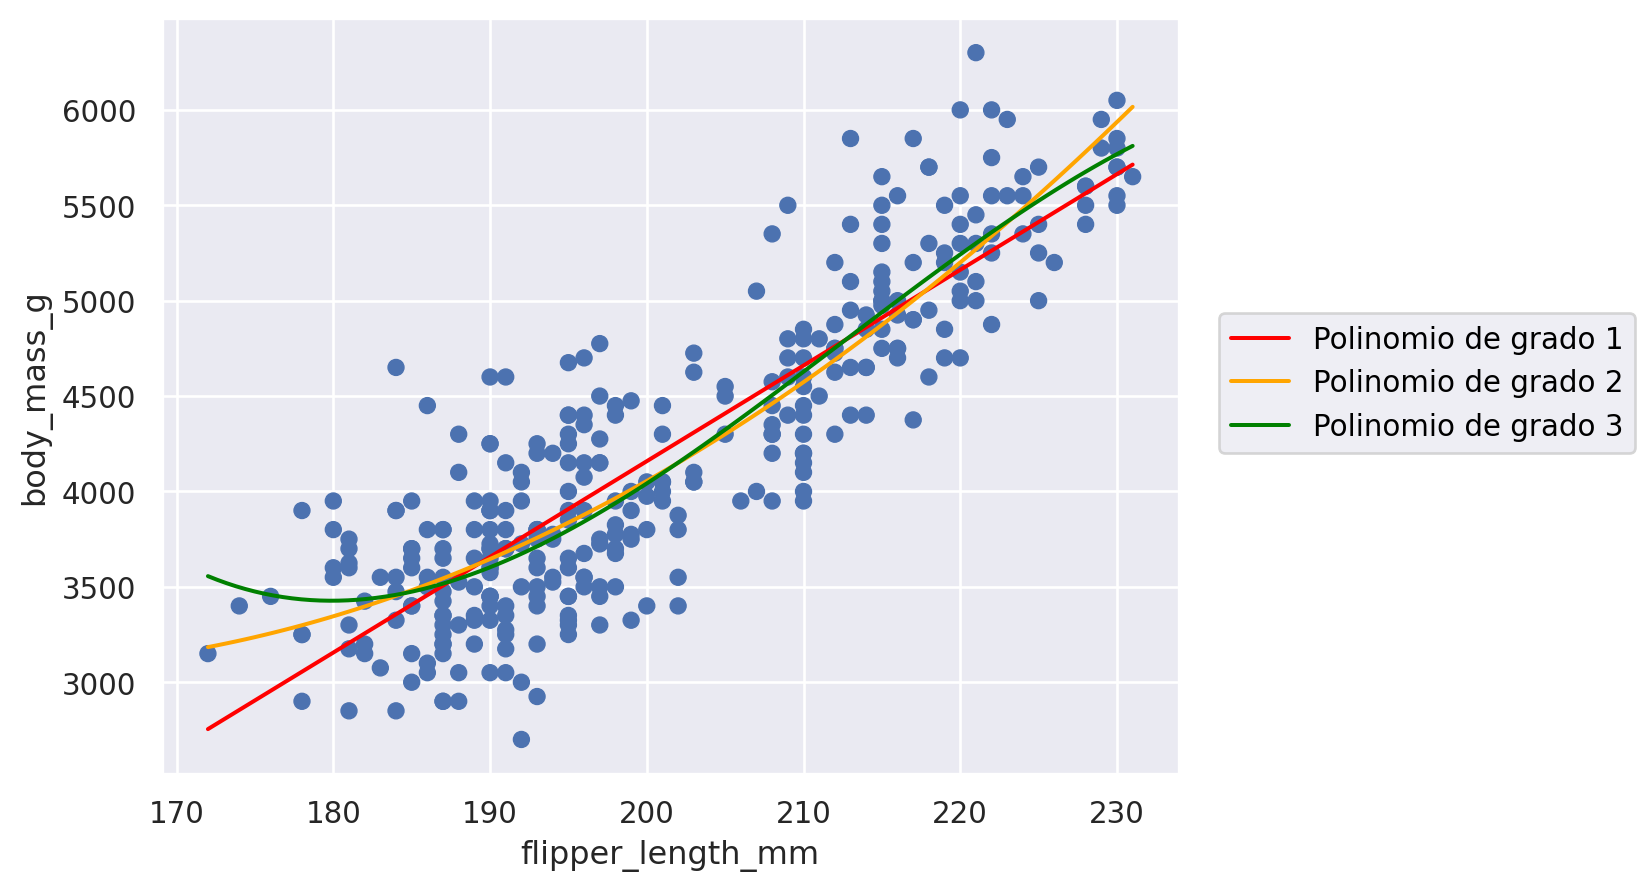

In [34]:
(
    so.Plot(penguins,x="flipper_length_mm",y="body_mass_g")
    .add(so.Dot())
    .add(so.Line(color="red"),so.PolyFit(1),label="Polinomio de grado 1")
    .add(so.Line(color="orange"),so.PolyFit(2),label="Polinomio de grado 2")
    .add(so.Line(color="green"),so.PolyFit(3),label="Polinomio de grado 3")
)

Efectivamente, no parecería que estemos ganando mucha precisión al usar un polinomio cúbico. Personalmente me quedaría con la regresión lineal en este caso.

## Ejercicio 2

En el archivo $\texttt{50\_startups.csv}$ tenemos los siguientes datos de 50 compañías: gastos en investigación y desarrollo, gastos administrativos, gastos en marketing y ganancias. Queremos estiamr las ganancias a partir de los gastos en las distinas áreas

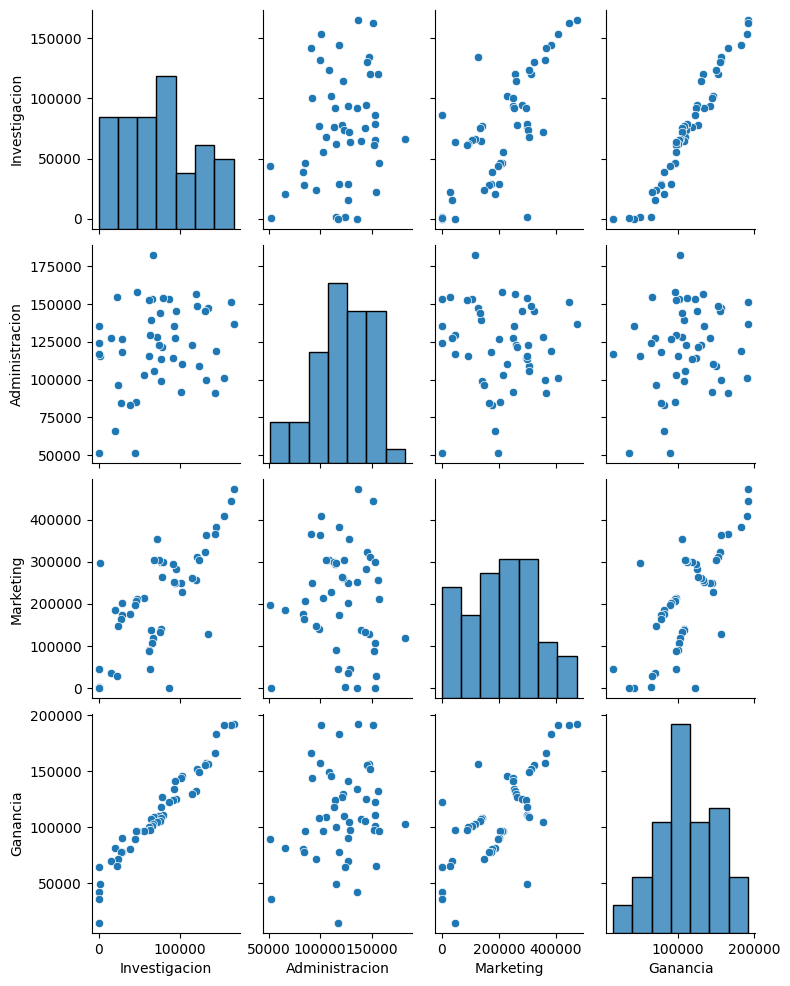

In [4]:
startups=pd.read_csv('../../datos/50_Startups.csv')
sns.pairplot(
    data=startups, aspect=.8)

Parecería ser que lo mejor va a ser diseñar un modelo lineal (si usarámos una sola variable predictora) Ganancia vs Investigacion

In [6]:
modelo = linear_model.LinearRegression()
modelo.fit(startups[['Investigacion']],startups[['Ganancia']])

LinearRegression()

In [8]:
print("Error cuadrático medio del modelo: ", mean_squared_error(startups['Ganancia'],modelo.predict(startups[['Investigacion']])))

Error cuadrático medio del modelo:  85120931.32706906


Me sorprende esta cantidad de error, vamos a hacer un plot

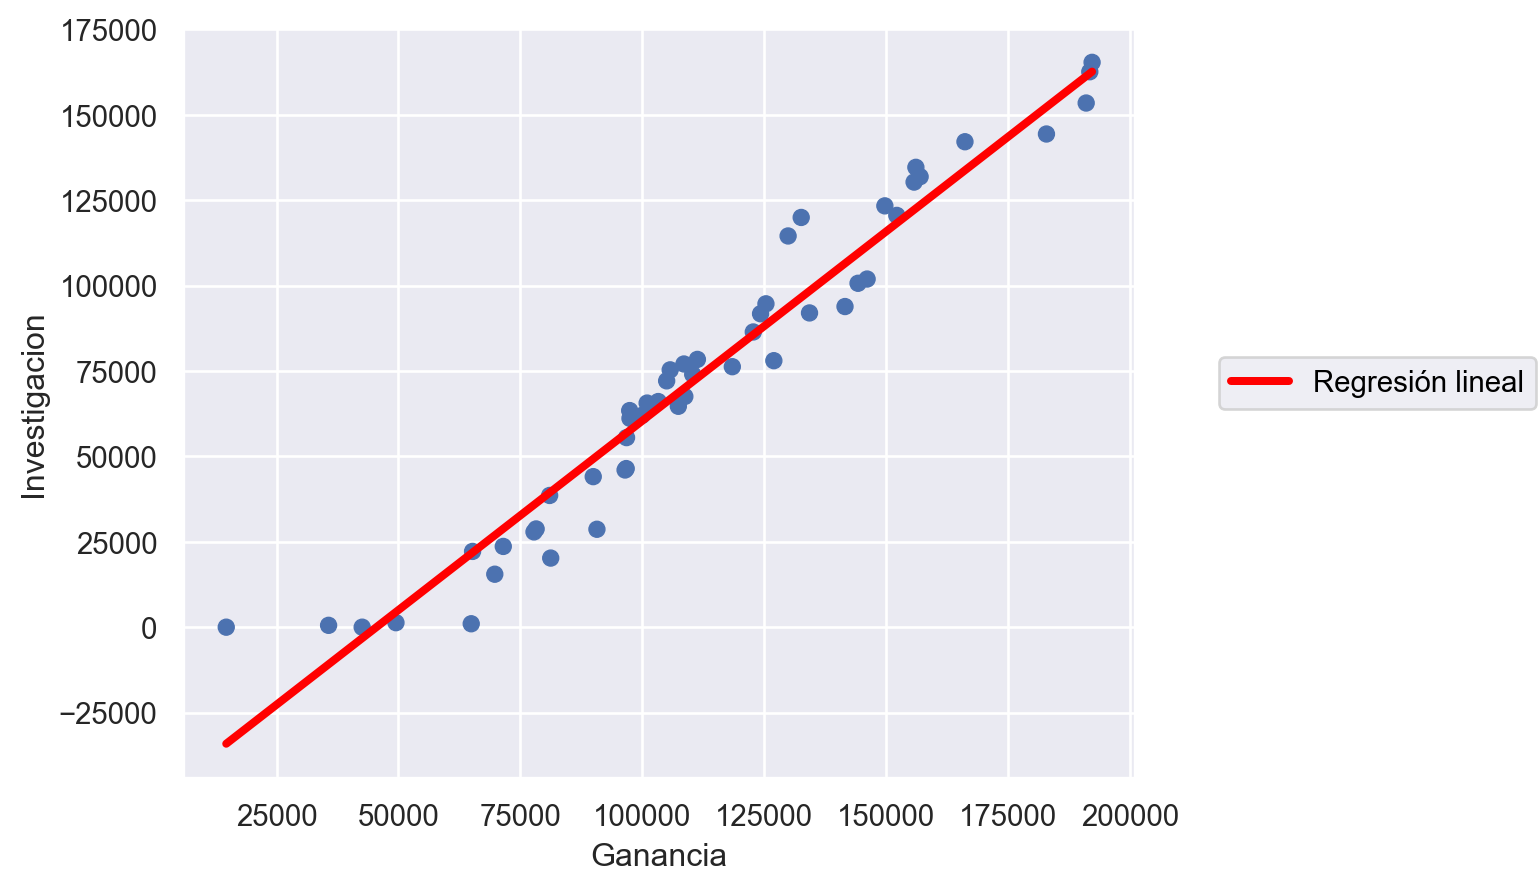

In [9]:
(
    so.Plot(data=startups,x="Ganancia",y="Investigacion")
    .add(so.Dot())
    .add(so.Line(color="red",linewidth=3),so.PolyFit(1),label="Regresión lineal")
)

In [10]:
ecm = mean_squared_error(startups['Ganancia'],modelo.predict(startups[['Investigacion']]))
np.sqrt(ecm)

9226.100548285232

Bueno, a lo mejor no es tanto error, si no que los números son muy grandes, calculemos el $R^2$ que seguro nos tira más data

In [11]:
r2 = r2_score(startups['Ganancia'],modelo.predict(startups[['Investigacion']]))

In [14]:
print("R cuadrado:", r2)

R cuadrado: 0.9465353160804393


Ahi va, ahora si podemos confirmar que el modelo lineal que hicimos es muy bueno

Con esta información, sospecho que algun modelo lineal multivariado tampoco me ayudaría muchisimo más (porque conseguir un $R^2$ mas grande que $0.95$ ya parece muy ambicioso, honestamente, jajaj)

In [23]:
x=startups.drop(columns=['Ganancia','Estado'],axis=1)
y=startups['Ganancia']
modelo2 = linear_model.LinearRegression()
modelo2.fit(x,y)

LinearRegression()

In [24]:
print("R2 del modelo multivariado: ",r2_score(y,modelo2.predict(x)))

R2 del modelo multivariado:  0.9507459940683246


Efectivamente, conseguimos un $R^2$ más alto, pero ¿a qué precio?, ¿vale la pena agregar dos variables más al modelo por un $\approx 0.01$ más de precisión?

## Ejercicio 3

En el $\textbf{Ejercicio 1}$ no tuvimos en cuenta el sexo del pingüino para predecir el peso, y puede ser una variable importante. Se quiere predecir ahora el peso de un pingüino usanddo como variables predictoras el largo de la aleta y el sexo del pingüino (utilizar el DataFrame sin datos faltantes, como vimos en el $\textbf{Ejercicio 1(a)}$).

In [2]:
penguins = sns.load_dataset('penguins')
penguins = penguins.dropna()
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
4       3450.0  Female  
5       3650.0    Male

La variable "sex" toma valores Male o Female, es categórica nominal. Es una variable binaria, pues solo hay dos estados posibles, sin embargo no esta de más notar que no es un Boolean

### Codificación de variables binarias

In [3]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
sex01 = encoder.fit_transform(penguins[['sex']])
penguins ['sex01'] = sex01

In [4]:
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  sex01  
0       3750.0    Male    1.0  
1       3800.0  Female    0.0  
2       3250.0  Female    0.0  
4       3450.0  Female    0.0  
5       3650.0    Male    1.0

In [58]:
modelo = linear_model.LinearRegression()
x = penguins[["flipper_length_mm","sex01"]]
y= penguins['body_mass_g']
modelo.fit(x,y)

LinearRegression()

In [59]:
print("beta_0:",modelo.intercept_)
beta_0=modelo.intercept_

beta_0: -5410.300224143296


In [14]:
modelo.coef_

array([ 46.98217525, 347.85025373])

In [60]:
print("beta_1:",modelo.coef_[0])
print("beta_2:",modelo.coef_[1])
beta_1=modelo.coef_[0]
beta_2=modelo.coef_[1]

beta_1: 46.982175248998736
beta_2: 347.8502537275249


Calculemos ahora el error cuadrático medio

In [11]:
print("Error cuadrático medio del modelo: ", mean_squared_error(y,modelo.predict(x)))

Error cuadrático medio del modelo:  125511.63258095707


In [12]:
print("Raiz del ECM del modelo: ", np.sqrt(mean_squared_error(y,modelo.predict(x))))

Raiz del ECM del modelo:  354.2762094481608


Recordando que el error cuadrático medio (en el grupo de train) era 159873, y ahora es 125511, claramente el modelo mejoró

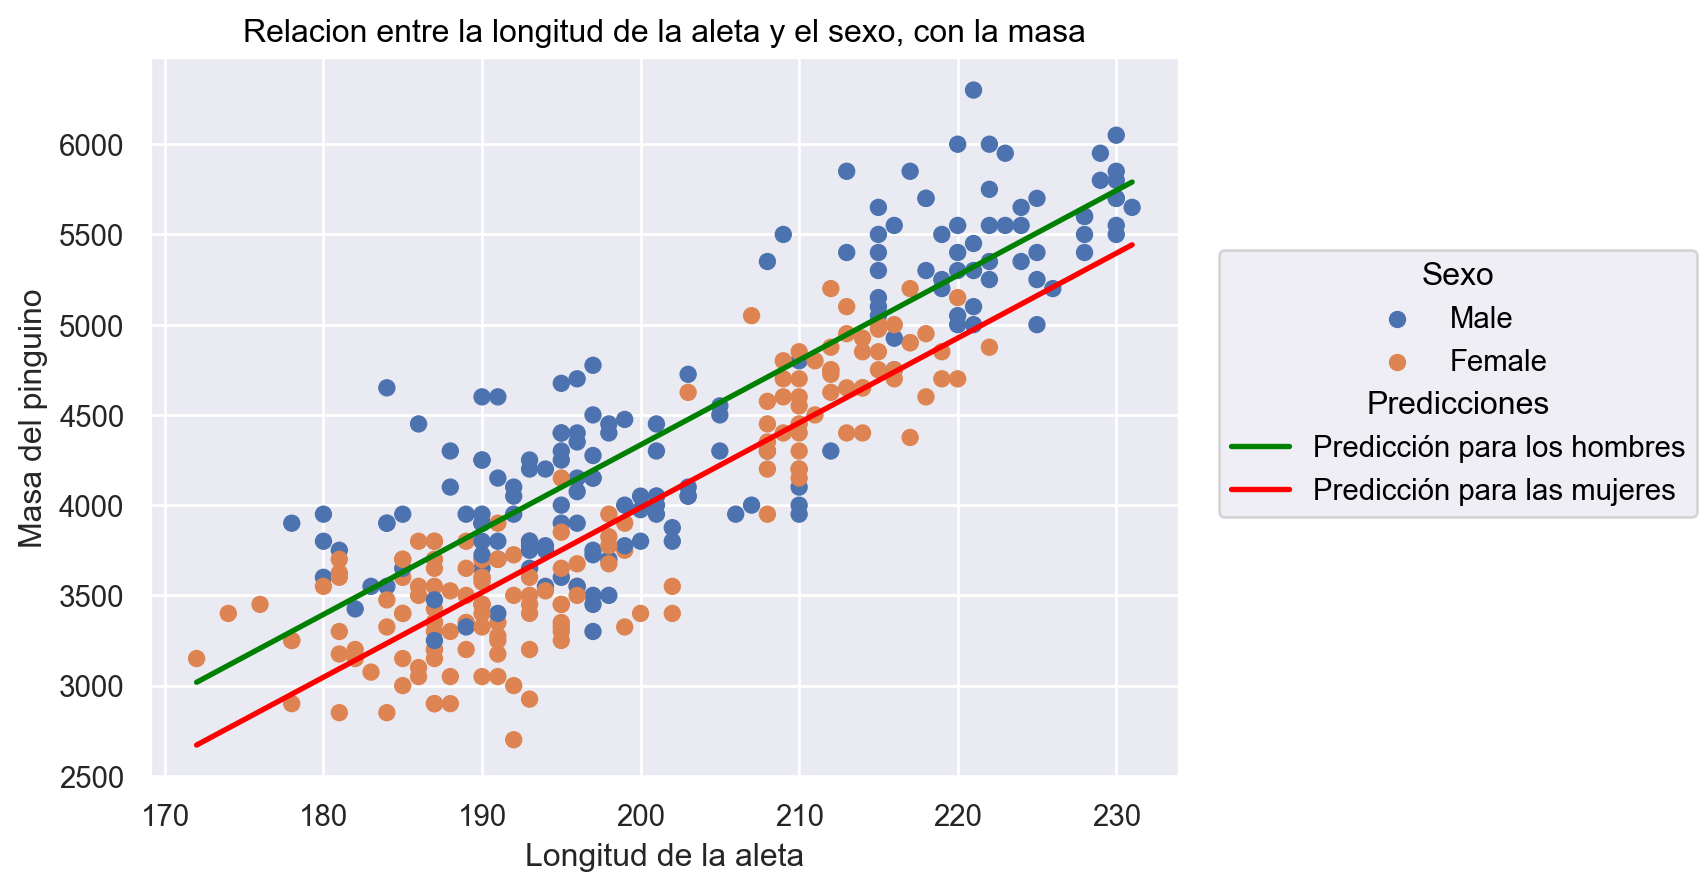

In [61]:
(
    so.Plot(data=penguins,x="flipper_length_mm",y="body_mass_g")
    .add(so.Dot(),color="sex",)
    .add(so.Line(color="green",linewidth=2),y=beta_0+beta_1*penguins.flipper_length_mm+beta_2,label="Predicción para los hombres")
    .add(so.Line(color="red",linewidth=2),y=beta_0+beta_1*penguins.flipper_length_mm,label="Predicción para las mujeres")
    .label(legend="Predicciones")
).label(x="Longitud de la aleta",y="Masa del pinguino",title="Relacion entre la longitud de la aleta y el sexo, con la masa",color="Sexo")

La diferencia predicta por el modelo sería el $\beta_2$

In [37]:
beta_2

347.8502537275249

Es decir, $\approx 347.85$ gramos

## Ejercicio 4

In [38]:
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  sex01  
0       3750.0    Male    1.0  
1       3800.0  Female    0.0  
2       3250.0  Female    0.0  
4       3450.0  Female    0.0  
5       3650.0    Male    1.0

$species$ es una variable categórica nominal, no es binaria, hay por lo menos 3 especies

In [62]:
from sklearn.preprocessing import OneHotEncoder
encoderOHE = OneHotEncoder(sparse_output=False)
species3 = encoderOHE.fit_transform(penguins[['species']])
species3_df = pd.DataFrame(species3,
    columns = encoderOHE.get_feature_names_out(),
    index = penguins.index)
penguins3 = pd.concat([penguins,species3_df],axis=1)
penguins3.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  sex01  species_Adelie  species_Chinstrap  \
0       3750.0    Male    1.0             1.0                0.0   
1       3800.0  Female    0.0             1.0                0.0   
2       3250.0  Female    0.0             1.0                0.0   
4       3450.0  Female    0.0             1.0                0.0   
5       3650.0    Male    1.0             1.0                0.0   

   species_Gentoo  
0             0.0  
1             0.0  
2             0.0  
4             0.0  
5             0.0

In [63]:
penguins3.isnull().values.any()

False

Ahora ajustemos nuestro modelo, teniendo en cuenta las especies

In [64]:
modelo3 = linear_model.LinearRegression()
x = penguins3[["flipper_length_mm","species_Adelie","species_Chinstrap","species_Gentoo"]]
y= penguins3['body_mass_g']
modelo3.fit(x,y)

LinearRegression()

In [65]:
print("beta_0:",modelo.intercept_)
beta_0=modelo3.intercept_

beta_0: -5410.300224143296


In [66]:
print("beta_1:",modelo3.coef_[0])
print("beta_2:",modelo3.coef_[1])
print("beta_3:",modelo3.coef_[2])
print("beta_4:",modelo3.coef_[3])
beta_1=modelo3.coef_[0]
beta_2=modelo3.coef_[1]
beta_3=modelo3.coef_[2]
beta_4=modelo3.coef_[3]

beta_1: 40.606165290639055
beta_2: -26.382707668450564
beta_3: -231.75818750800912
beta_4: 258.1408951764587


In [68]:
print("Error cuadrático medio del modelo: ", mean_squared_error(y,modelo3.predict(x)))

Error cuadrático medio del modelo:  137667.1001914201


In [69]:
print("Raiz del ECM del modelo: ", np.sqrt(mean_squared_error(y,modelo3.predict(x))))

Raiz del ECM del modelo:  371.03517379275524


Comete un poco mas de error que el modelo del sexo, y un poco menos que el original que solo tenia en cuenta la aleta, ambas cosas tienen sentido para mí

Hagamos la visualización:

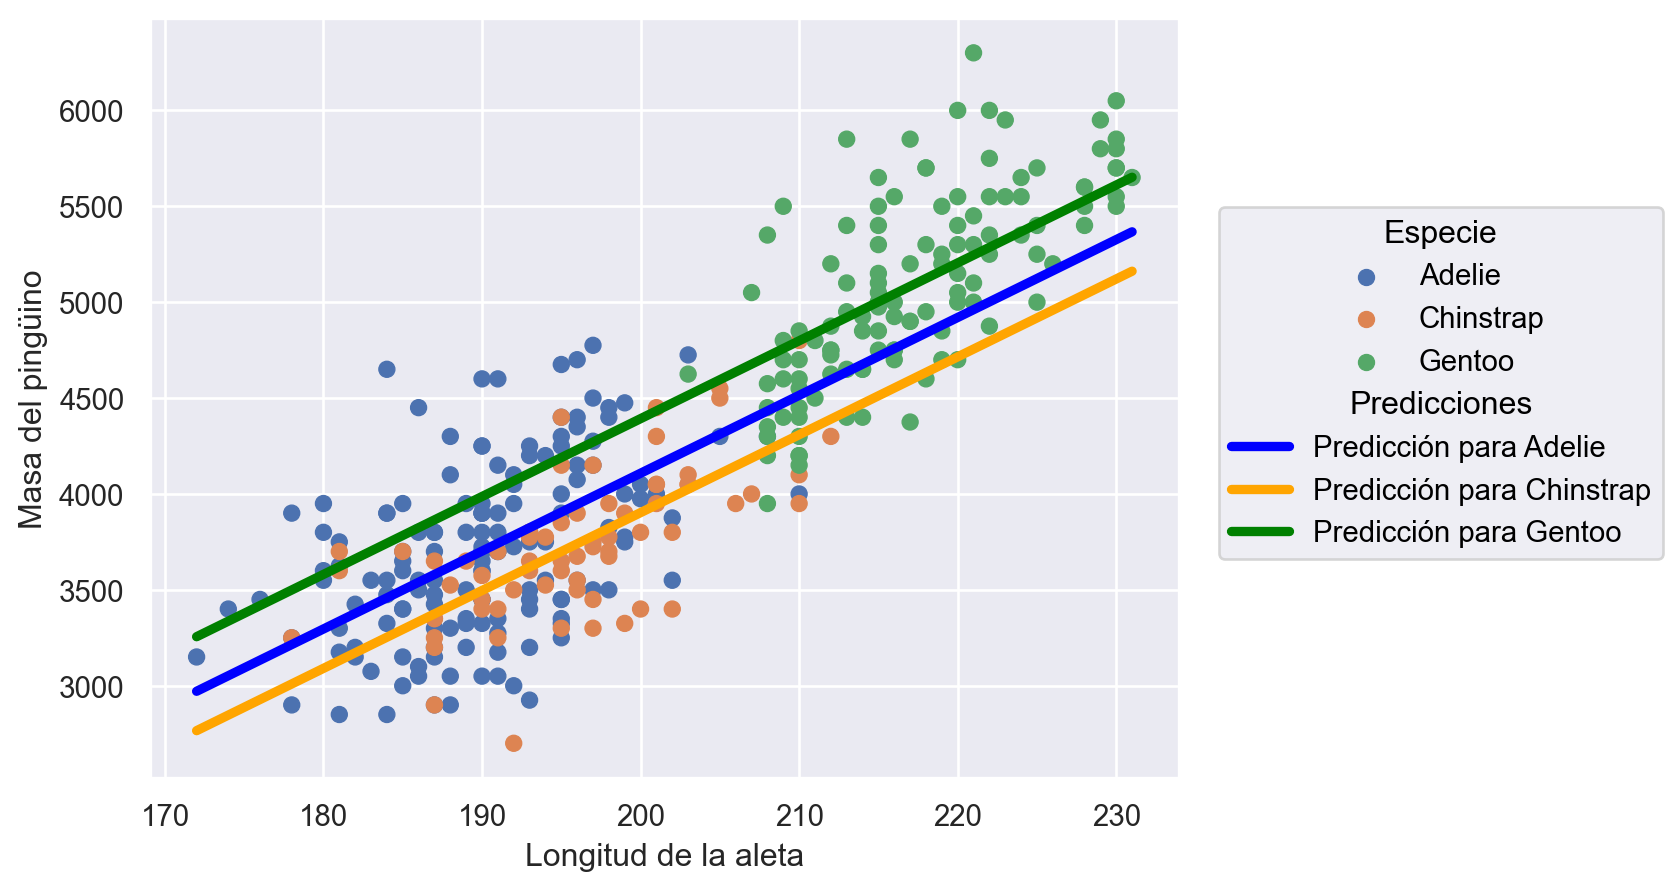

In [82]:
(
    so.Plot(data=penguins3,x="flipper_length_mm")
    .add(so.Dot(),y="body_mass_g",color="species")
    .add(so.Line(color="blue",linestyle="-",linewidth=3.5),y=beta_0+beta_1*penguins3['flipper_length_mm']+beta_2,label="Predicción para Adelie")
    .add(so.Line(color="orange",linestyle="-",linewidth=3.5),y=beta_0+beta_1*penguins3['flipper_length_mm']+beta_3,label="Predicción para Chinstrap")
    .add(so.Line(color="green",linestyle="-",linewidth=3.5),y=beta_0+beta_1*penguins3['flipper_length_mm']+beta_4,label="Predicción para Gentoo")
    .label(legend="Predicciones")
).label(x="Longitud de la aleta",y="Masa del pingüino",color="Especie")

## Ejercicio 5

In [11]:
#pip install formulaic

In [64]:
from formulaic import Formula
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [12]:
inmuebles = pd.read_csv('../../datos/inmuebles.csv')
inmuebles.head()

superficie      precio    zona
0       110.0  454.425690  Zona 2
1       109.0  383.004114  Zona 2
2       101.0  437.362638  Zona 2
3        58.0  304.392486  Zona 3
4       129.0  620.027722  Zona 3

In [13]:
def recm(y,y_pred):
    return np.sqrt(mean_squared_error(y,y_pred))

### Nivel 1

In [39]:
def obtenerRecm (formula):
    #Obtengo las y y las X usando la formula
    y, X = Formula(formula).get_model_matrix(inmuebles)

    # Fitteo el modelo con los datos
    modelo = LinearRegression(fit_intercept=False)
    modelo.fit(X,y)

    # Busco el valor de y predicho por el modelo
    y_pred = modelo.predict(X)

    # Devuelvo la raiz del error cuadrático medio
    return recm(y,y_pred)

Por supuesto, mi modelo 3 propuesto será `precio ~ superficie * zona`

In [40]:
formulas =  ['precio ~ superficie','precio ~ superficie + zona','precio ~ superficie * zona']
errores = []
for i in range(0,len(formulas)):
    errores.append(obtenerRecm(formulas[i]))
errores

[51.29259207668, 29.848178898483575, 23.33193083654303]

In [41]:
def obtenerPredicciones(formula):
    y, X = Formula(formula).get_model_matrix(inmuebles)

    # Fitteo el modelo con los datos
    modelo = LinearRegression(fit_intercept=False)
    modelo.fit(X,y)

    # Busco el valor de y predicho por el modelo
    y_pred = modelo.predict(X)

    # Devuelvo las predicciones
    return y_pred

In [42]:
predicciones = []
for i in range(0,len(formulas)):
    predicciones.append(obtenerPredicciones(formulas[i]))

In [43]:
(
    so.Plot(data=inmuebles, x="superficie")
    .add(so.Dot(), y=inmuebles["precio"], color="zona")
    .add(so.Line(), y=predicciones[1].flatten(),color="zona", label="Modelo 2")
    .add(so.Line(linestyle="--"), y=predicciones[2].flatten(),color="zona",label="Modelo 3")
)

### Nivel 2

In [51]:
def entrenarModelo(formula):
    
    y, X = Formula(formula).get_model_matrix(inmuebles)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Fitteo el modelo con los datos
    modelo = LinearRegression(fit_intercept=False)
    modelo.fit(X_train,y_train)

    y_pred = modelo.predict(X_test)
    
    # Devuelvo el modelo entrenado
    return modelo, recm(y_test,y_pred)

In [52]:
modelos = []
for i in range (0, len(formulas)):
    modelos.append(entrenarModelo(formulas[i]))
modelos

[(LinearRegression(fit_intercept=False), 57.02533063146178),
 (LinearRegression(fit_intercept=False), 40.013442117354025),
 (LinearRegression(fit_intercept=False), 31.144147767082003)]

El que mejor rendimiento tiene en el conjunto de testeo es el `Modelo 3`

### Nivel 3

In [53]:
errores_en_val = []
for i in range(0,len(formulas)):
    # Parto el conjunto en 60% train, 20% validación, 20% test
    y,X = Formula(formula[i]).get_model_matrix(inmuebles)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    #Fitteo cada modelo con los datos de train
    modelo = LinearRegression(fit_intercept = False)
    modelo.fit(X_train,y_train)

    y_pred = modelo.predict(X_val)
    error = recm(y_val,y_pred)
    
    errores_en_val.append(error)
errores_en_val

[53.82535308208889, 27.709038059888577, 21.684525068438003]

Gracias a esto, deducimos que el `Modelo 3`, es decir `precio ~ superficie * zona` es el que mejores resultados obtiene en validación. Veamos que pasa al evaluarlo en su conjunto de testeo

In [59]:
y,X = Formula('precio ~ superficie * zona').get_model_matrix(inmuebles)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Entreno el modelo, ahora con la unión de los casos de train y de validación
modelo = LinearRegression(fit_intercept = False)
modelo.fit(X_train,y_train)

y_pred = modelo.predict(X_val)

#Muestro el RECM y el R^2 del modelo en testeo
y_pred_test = modelo.predict(X_test)
print("RECM del modelo en testeo: " + str(recm(y_test,y_pred_test)))
print("R^2 del modelo en testeo: " + str(r2_score(y_test,y_pred_test)))

RECM del modelo en testeo: 31.144147767082003
R^2 del modelo en testeo: 0.9532442300210663


Efectivamente, con un $31.1$ de $RECM$ y un $0.95$ de $R^2$, podemos confirmar que el `Modelo 3` es un muy buen modelo, que mantiene su efectividad en el conjunto de testeo

### Nivel 4

_Comentario:_ Acá note que hubiera sido mas fácil si desde un principio hubiera dividido el DataFrame entero en `train` y `test`
A buena hora, la verdad, pero bue, es lo que hay

In [61]:
inmuebles_train, inmuebles_test = train_test_split(inmuebles, test_size=0.2, random_state=42)

In [66]:
def KFoldCrossValidation(formula):
    y, X = Formula(formula).get_model_matrix(inmuebles_train)

    # Defino los subconjuntos de validación cruzada
    cv = KFold(n_splits=6, random_state=42, shuffle=True)

    #Inicializo un modelo de regresión lineal
    modelo = linear_model.LinearRegression(fit_intercept = False)
    #Lleno de ceros un vector donde voy a guardar los errores del modelo
    errores_kfold = np.zeros(cv.get_n_splits())

    i=0;
    #Este for agarra los indices de train y de validation de cada fold
    for train_index, val_index in cv.split(X):
        #Defino los conjuntos de train y de validation
        X_train, X_val, y_train, y_val = X.iloc[train_index], X.iloc[val_index], y.iloc[train_index], y.iloc[val_index]
        
        #Entreno el modelo
        modelo.fit(X_train,y_train)

        #Guardo el error del fold
        y_pred = modelo.predict(X_val)
        errores_kfold[i] = recm(y_val,y_pred)
        i+=1

    #Devuelvo el promedio de los errores de los folds
    return errores_kfold.mean() 

In [67]:
print(KFoldCrossValidation(formula[0]))
print(KFoldCrossValidation(formula[1]))
print(KFoldCrossValidation(formula[2]))

50.131270649414915
27.850385592009825
21.771965390870378


Nuevamente, todo me lleva a decidirme por elegir el `Modelo 3`

In [69]:
y_train, X_train = Formula(formula[2]).get_model_matrix(inmuebles_train)
y_test, X_test = Formula(formula[2]).get_model_matrix(inmuebles_test)

modelo_final = LinearRegression(fit_intercept=False)
modelo_final.fit(X_train,y_train)

y_pred = modelo_final.predict(X_test)

r2 = r2_score (y_test,y_pred)
raizDelError = recm(y_test,y_pred)

print("R^2: ",r2)
print("Raiz del Error Cuadrático Medio: ", raizDelError)

R^2:  0.9532442300210663
Raiz del Error Cuadrático Medio:  31.144147767082003


Por supuesto, me da los mismos errores que recién.

## Ejercicio 6

In [74]:
df = pd.read_csv('../../datos/credit.csv')
df.columns

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender',
       'Student', 'Married', 'Ethnicity', 'Balance'],
      dtype='object')

In [76]:
columns = ['Income','Limit','Rating','Cards','Age','Education']
df[columns] /= df[columns].max()
df.head()

Income     Limit    Rating     Cards       Age  Education  Gender  \
0  0.079787  0.259182  0.288187  0.222222  0.346939       0.55    Male   
1  0.568090  0.477611  0.491853  0.333333  0.836735       0.75  Female   
2  0.560418  0.508517  0.523422  0.444444  0.724490       0.55    Male   
3  0.797947  0.683102  0.693483  0.333333  0.367347       0.55  Female   
4  0.299420  0.351973  0.363544  0.222222  0.693878       0.80    Male   

  Student Married  Ethnicity  Balance  
0      No     Yes  Caucasian      333  
1     Yes     Yes      Asian      903  
2      No      No      Asian      580  
3      No      No      Asian      964  
4      No     Yes  Caucasian      331

In [77]:
df_train, df_test = train_test_split(df,test_size=0.2,random_state=42)

In [84]:
y, X = Formula('Balance ~ Income + Limit + Rating + Cards + Age + Education').get_model_matrix(df_train)
y_test, X_test =  Formula('Balance ~ Income + Limit + Rating + Cards + Age + Education').get_model_matrix(df_test)
modelo = LinearRegression(fit_intercept = False)
modelo.fit(X,y)

y_pred = modelo.predict(X_test)

recm(y_test,y_pred)

172.81167061741576

### Regresión Ridge

In [85]:
alphas = np.array([0.001,0.005,0.01,0.02,0.1,0.5,1])

In [121]:
def testear_alphas(alphas):
    cv = KFold(n_splits=5, random_state=42, shuffle=True)
    for alpha in alphas:
        # Inicializamos un modelo de Regresion Lineal sin intercept
        modeloRidge = Ridge(alpha = alpha, fit_intercept = False)    
        rmse = np.zeros(cv.get_n_splits())  # Vamos a guardar el error en cada pliego
    
        ind = 0
    
        # Para seleccionar algunas filas dados los índices, utilizamos iloc 
        for train_index, val_index in cv.split(X):
            X_train, X_val, y_train, y_val = X.iloc[train_index], X.iloc[val_index], y.iloc[train_index], y.iloc[val_index]
            modeloRidge.fit(X_train, y_train)
    
            y_pred = modeloRidge.predict(X_val)
            rmse[ind] = np.sqrt(mean_squared_error(y_val, y_pred))
            ind = ind + 1
    
        print(f"Para alpha = {alpha:.5f} la raíz del Error Cuadratico Medio es: {rmse.mean():.5f}")
        

In [126]:
testear_alphas(alphas)

Para alpha = 0.00100 la raíz del Error Cuadratico Medio es: 157.87868
Para alpha = 0.00500 la raíz del Error Cuadratico Medio es: 157.85510
Para alpha = 0.01000 la raíz del Error Cuadratico Medio es: 157.84056
Para alpha = 0.02000 la raíz del Error Cuadratico Medio es: 157.83194
Para alpha = 0.10000 la raíz del Error Cuadratico Medio es: 158.11547
Para alpha = 0.50000 la raíz del Error Cuadratico Medio es: 164.57367
Para alpha = 1.00000 la raíz del Error Cuadratico Medio es: 176.89164


Parece que alrededor de $\alpha \approx 0.02$ el RMSE es el mínimo, ahora probemos su rendimiento en $X_{test}$

In [128]:
modeloRidge_final = Ridge(alpha=0.2,fit_intercept=False)
modeloRidge.fit(X,y)

y_pred = modeloRidge.predict(X_test)

recm(y_test,y_pred)

195.6874207233641

Obtuve mejores resultados con la regresión No Ridge....

<font color='red'>**Preguntar por qué**</font>